# House Price Prediction using Linear Regression
Computer programs that uses algorithms analyze data and make intelligent predictions based on the data without being explicitly programmed.<br>
f(x) --->  y <br>
here we can say x is the input feature, and y is the output or the predictions.<br>
In this project, we are predicting the house prices (y, dependent variable) based on various independent features like size(x1), no of rooms(x2), no of bathrooms(x3), garden(x4) etc. <br>
Here the data is labelled, and we know what our output looks like(here it is a continuous value) hence Supervised learning. <br>
Supervised Learning problems are divided into two : <br>
Regression - output: Continuous value <br>
Classification - output: Discrete value <br>

Here, in predicting house price, the output price will be a continuous value, hence it will be a Regression problem.

## Linear Regression

We are using Linear Regression from sklearn. Here the hypothesis of the graph between Price vs Size will be a straight line. It constructs a linear line.<br>
The assumption of Linear Regression is that the data should be linear and it should have a linear relationship.And there should be no or little multi colinearity between variables.<br>

The goal of Linear Regression is to find a linear relationship between the independent variables x and dependent variable y. <br>
y = mx + b <br>
where m = slope and b = y-intercept <br>
The goal of linear regression is to find the values of m and b that minimize the difference between the predicted values y' and the actual value y.<br>
We can define the difference between the predicted value and the actual values as the residual or error <br>
e*i* = y*i*  -  y'*i*

# Data Collection
Data was collected from Kaggle

In [26]:
import pandas as pd
housing_data = pd.read_csv('/kaggle/input/housedata/data.csv')  

print(housing_data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [27]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Data Preprocessing

Let's check if there are any missing values in this dataset. LinearRegression from scikit-learn requires all data to be numeric for modeling.  Lets preprocess the data using **One Hot Encoding** for handling Categorical data.

In [28]:
# Handle missing values
housing_data = housing_data.dropna() 

# Split the data into features and target variable
X = housing_data.drop('price', axis=1)  # x - Features
Y = housing_data['price']  # y - Target 


# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)


# Basic EDA

In [29]:
import matplotlib.pyplot as plt

# First find the lowest and highest prices in the 'price' column
lowest_price = housing_data['price'].min()
highest_price = housing_data['price'].max()

print(lowest_price)
print(highest_price)

0.0
26590000.0


In [30]:
# Finding the row with the highest price
highest_price_row = housing_data[housing_data['price'] == housing_data['price'].max()]

#I want to see the record of the house with the highest price in my dataset.
print("Record with the Highest Price:")
print(highest_price_row)

# Extract specific features for the record with the highest price
highest_price_features = highest_price_row[['bedrooms', 'sqft_above', 'bathrooms', 'sqft_living']]

print("\nFeatures for the Record with the Highest Price:")
print(highest_price_features)


Record with the Highest Price:
                     date       price  bedrooms  bathrooms  sqft_living  \
4350  2014-07-03 00:00:00  26590000.0       3.0        2.0         1180   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4350      7793     1.0           0     0          4        1180   

      sqft_basement  yr_built  yr_renovated             street  city  \
4350              0      1992             0  12005 SE 219th Ct  Kent   

      statezip country  
4350  WA 98031     USA  

Features for the Record with the Highest Price:
      bedrooms  sqft_above  bathrooms  sqft_living
4350       3.0        1180        2.0         1180


Look at this price!

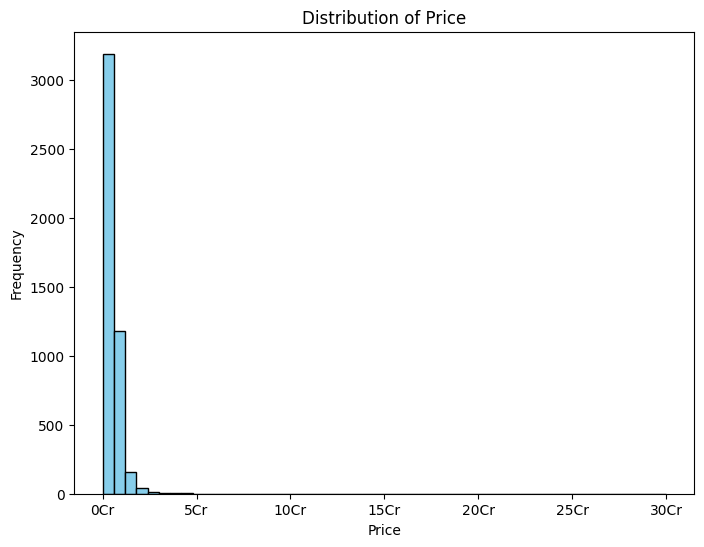

In [31]:
import matplotlib.pyplot as plt

# Plotting histogram of 'price'
plt.figure(figsize=(8, 6))
plt.hist(housing_data['price'], bins=50, color='skyblue', edgecolor='black', range=(0, 3e7))  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.ticklabel_format(style='plain', axis='x')  
plt.xticks(ticks=[i * 1e6 for i in range(0, 31, 5)], labels=[f'{i}Cr' for i in range(0, 31, 5)])
plt.show()


In [39]:
import matplotlib.pyplot as plt
import plotly.express as px
px.scatter(
    housing_data,
    y="sqft_living",
    x="price",
    title="Living Square Footage vs Price",
)

In [38]:
px.pie(
    housing_data,
    names={'0' : 'No Waterfront', '1' : 'Waterfront'},
    values=housing_data.waterfront.value_counts().values,
    title="Houses with Waterfront",
)

In [40]:
px.scatter(
    housing_data,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Price",
)


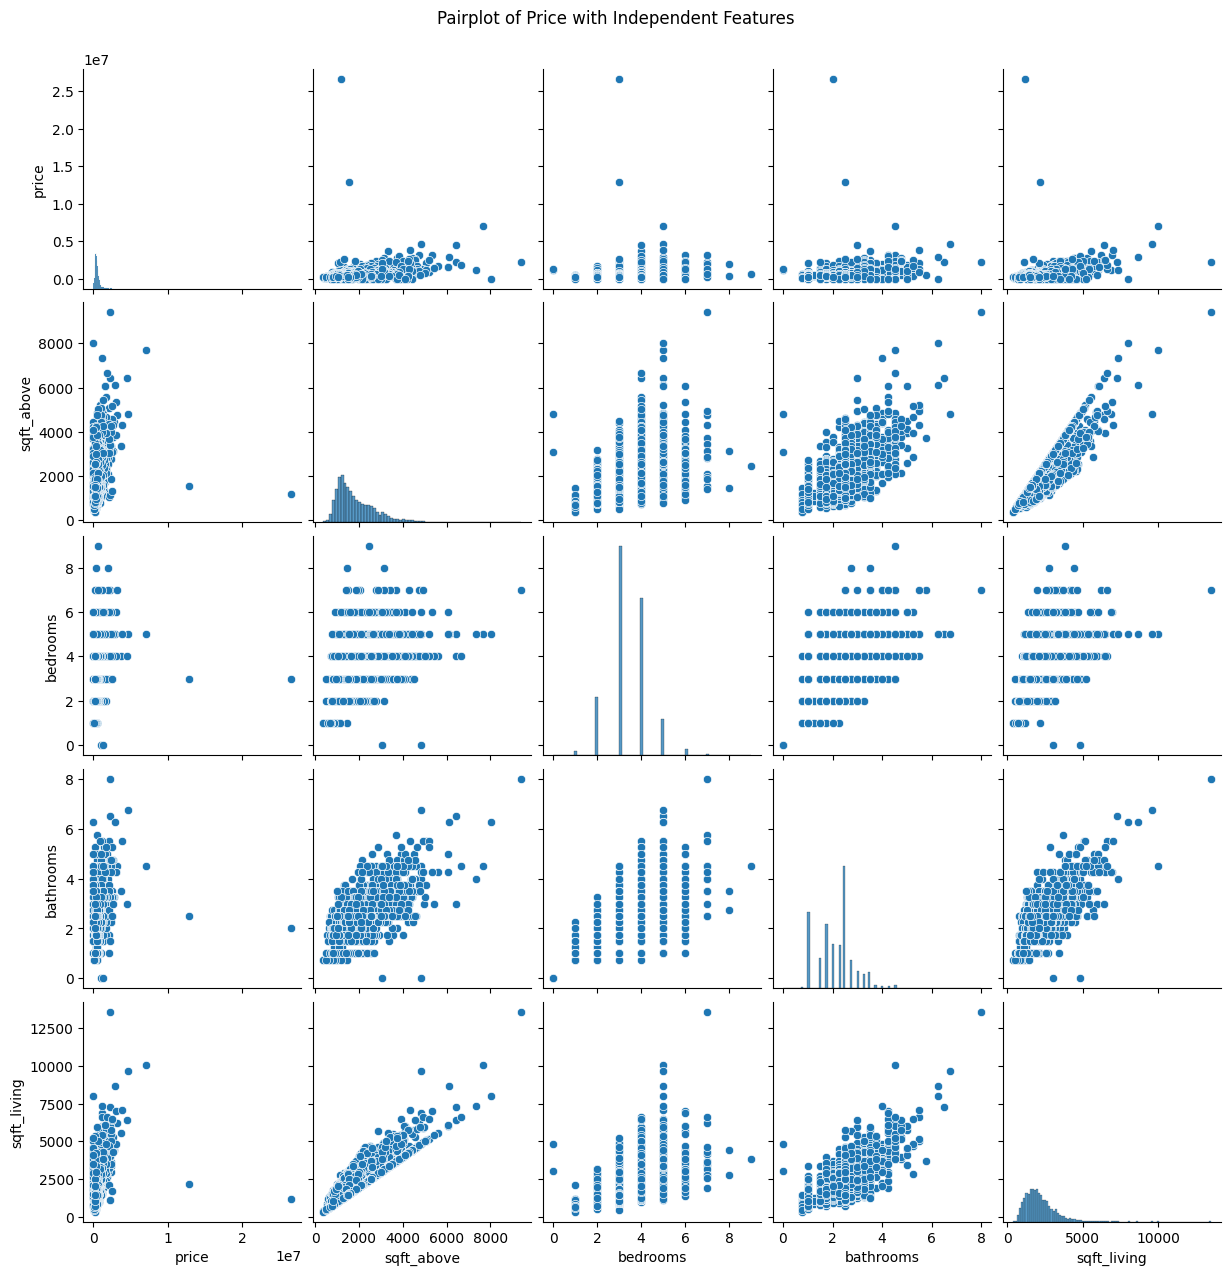

In [32]:
import seaborn as sns

# Pair plot of 'price' with independent features
myvariables = ['price', 'sqft_above', 'bedrooms', 'bathrooms', 'sqft_living']

# Pairplot
sns.pairplot(housing_data[myvariables])
plt.suptitle('Pairplot of Price with Independent Features', y=1.02)
plt.show()


# Model Building

Now we have the data input. f(x) - the algorithm must now be trained. The data is divided into 80% Training and 20% Testing. The testing data will be used to evaluate the model.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_encoded, Y_train)

# Make predictions on the test set
predictions_encoded = model.predict(X_test_encoded)


# Model Evaluation

In [35]:
# Evaluate the model
mse_encoded = mean_squared_error(Y_test, predictions_encoded)
rmse_encoded = mean_squared_error(Y_test, predictions_encoded, squared=False)
r2_encoded = r2_score(Y_test, predictions_encoded)

print(f"Mean Squared Error {mse_encoded}")
print(f"Root Mean Squared Error: {rmse_encoded}")
print(f"R-squared Score: {r2_encoded}")



Mean Squared Error 1158276051401.478
Root Mean Squared Error: 1076232.3408081909
R-squared Score: -0.13573585144475842


1. **Mean Squared Error (MSE)**:
   - The Mean Squared Error measures the average of the squared differences between predicted values and actual values.
   - A higher MSE value indicates higher average squared differences between predicted and actual values, suggesting poorer performance of the model.
   - In this example, MSE value is a very large number (1.16 trillion), implying that, on average, the squared differences between predicted and actual values are quite substantial.

2. **Root Mean Squared Error (RMSE)**:
   - The Root Mean Squared Error is the square root of the MSE and represents the average magnitude of errors in the same units as the target variable.
   - RMSE provides a more interpretable measure than MSE.
   - In this example, the RMSE value is approximately 1.08 million, indicating that, on average, the model's predictions are off by around 1.08 million units from the actual values.

3. **R-squared Score**:
   - The R-squared (coefficient of determination) measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in the model.
   - R-squared values range from -∞ to 1, where higher values closer to 1 indicate better fit.
   - A negative R-squared value can occur when the model performs worse than a horizontal line (a flat model predicting the mean of the target variable).
   - In this example, the negative R-squared value (-0.136) suggests that the model doesn't fit the data well and might perform worse than a model predicting the mean of the target variable.

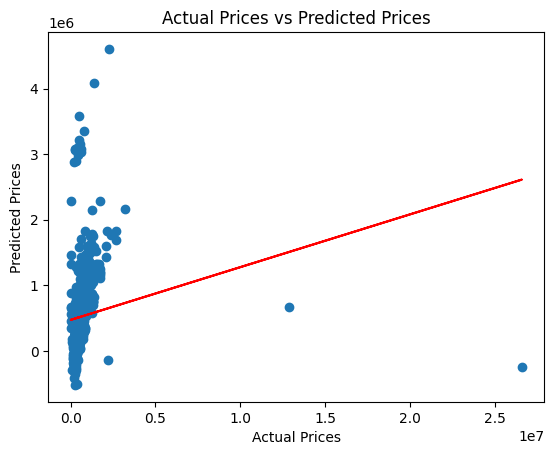

In [42]:
import numpy as np

# Scatter plot of Actual Prices vs Predicted Prices
plt.scatter(Y_test, predictions_encoded)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

trendline = np.polyfit(Y_test, predictions_encoded, 1)
plt.plot(Y_test, np.polyval(trendline, Y_test), color='red')  

plt.show()

These metrics collectively indicate that the model might not be a good fit for the data, displaying a high error rate and poor predictive capability. I have to improve the model. <br>
I will be trying different techniques to improve the model next.